## 머신러닝 실습

### 와인품질 등급 회귀분석

#### 데이터 수집

##### UC 어바인 머신러닝 연구소 모듈 사용

In [1]:
## 필수 라이브러리 사용등록
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo 

In [2]:
## 와인 데이터 가져오기, 와인품질 id=186
winQuality = fetch_ucirepo(id=186)

In [4]:
dfWineQuality = winQuality.data.original

In [5]:
dfWineQuality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
dfWineQuality.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


##### 머신러닝 준비
- X, y 값 생성


In [11]:
X = dfWineQuality.drop(['quality', 'color'], axis=1)

In [14]:
y = dfWineQuality['quality']

##### 분석모델 구축, 결과 분석

In [18]:
## 회귀분석용 모델, 함수 사용등록
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import sklearn

In [290]:
# 훈련용 데이터와 검증(평가)용 데이터 분리
# random_state=0~42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [291]:
X_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
1162,8.5,0.32,0.42,2.30,0.075,12.0,19.0,0.99434,3.14,0.71,11.80
6470,5.0,0.20,0.40,1.90,0.015,20.0,98.0,0.98970,3.37,0.55,12.05
2832,7.7,0.39,0.30,5.20,0.037,29.0,131.0,0.99430,3.38,0.44,11.00
6347,6.1,0.34,0.24,18.35,0.050,33.0,184.0,0.99943,3.12,0.61,9.30
3119,8.3,0.20,0.49,1.70,0.038,38.0,167.0,0.99390,3.05,0.37,10.10
...,...,...,...,...,...,...,...,...,...,...,...
968,9.0,0.40,0.43,2.40,0.068,29.0,46.0,0.99430,3.20,0.60,12.20
1667,6.7,0.23,0.31,2.10,0.046,30.0,96.0,0.99260,3.33,0.64,10.70
3321,7.5,0.40,1.00,19.50,0.041,33.0,148.0,0.99770,3.24,0.38,12.00
1688,7.1,0.44,0.62,11.80,0.044,52.0,152.0,0.99750,3.12,0.46,8.70


In [292]:
X_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
6245,5.9,0.180,0.28,1.0,0.037,24.0,88.0,0.99094,3.29,0.55,10.65
486,10.2,0.670,0.39,1.9,0.054,6.0,17.0,0.99760,3.17,0.47,10.00
273,8.4,0.715,0.20,2.4,0.076,10.0,38.0,0.99735,3.31,0.64,9.40
1993,6.8,0.370,0.51,11.8,0.044,62.0,163.0,0.99760,3.19,0.44,8.80
885,8.9,0.750,0.14,2.5,0.086,9.0,30.0,0.99824,3.34,0.64,10.50
...,...,...,...,...,...,...,...,...,...,...,...
1970,7.7,0.290,0.48,2.3,0.049,36.0,178.0,0.99310,3.17,0.64,10.60
1658,7.4,0.200,0.36,1.2,0.038,44.0,111.0,0.99260,3.36,0.34,9.90
3450,6.1,0.340,0.46,4.7,0.029,21.0,94.0,0.99100,3.29,0.62,12.30
549,9.0,0.530,0.49,1.9,0.171,6.0,25.0,0.99750,3.27,0.61,9.40


In [293]:
y_train

1162    7
6470    6
2832    6
6347    5
3119    6
       ..
968     6
1667    8
3321    6
1688    6
5994    5
Name: quality, Length: 4547, dtype: int64

In [294]:
y_test

6245    7
486     5
273     5
1993    5
885     5
       ..
1970    6
1658    6
3450    6
549     6
2719    6
Name: quality, Length: 1950, dtype: int64

In [295]:
## 선형회귀 모델 생성
model = LinearRegression()

In [296]:
# 선형회귀 모델 훈련
model.fit(X_train, y_train) # X는 독립변수 11, y는 종속변수(품질)

LinearRegression()

In [297]:
# 선형회귀 분석, 예측
# X_test를 매개변수로 실행했을 때 문제가 생기면 np.array(X_test)를 사용.
y_predict = model.predict(X_test)

In [298]:
y_test

6245    7
486     5
273     5
1993    5
885     5
       ..
1970    6
1658    6
3450    6
549     6
2719    6
Name: quality, Length: 1950, dtype: int64

In [299]:
y_predict

array([6.07346136, 5.17711262, 5.02389518, ..., 6.47191196, 5.17784523,
       5.94751622])

In [300]:
## 분석평가지표별 수치 
## MSE, RMSE가 0에 가까우면 예측값과 실제값간의 차이가 거의 없음
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

print(f'MSE = {mse:.4f}')
print(f'RMSE = {rmse:.4f}')
print(f'R^2(VS) = {r2:.4f}')

MSE = 0.5270
RMSE = 0.7260
R^2(VS) = 0.3066


In [301]:
## Y절편값, 회귀계수 값
print(f'Y절편값 = {model.intercept_:.4f}')
print(f'독립변수별 회귀계수값 = {np.round(model.coef_, 1)}')

Y절편값 = 48.8662
독립변수별 회귀계수값 = [  0.1  -1.4  -0.1   0.   -0.5   0.   -0.  -47.6   0.3   0.7   0.3]


In [302]:
pd.Series(data=np.round(model.coef_, 2), index=X.columns)

fixed_acidity            0.06
volatile_acidity        -1.37
citric_acid             -0.14
residual_sugar           0.04
chlorides               -0.49
free_sulfur_dioxide      0.00
total_sulfur_dioxide    -0.00
density                -47.64
pH                       0.32
sulphates                0.74
alcohol                  0.28
dtype: float64

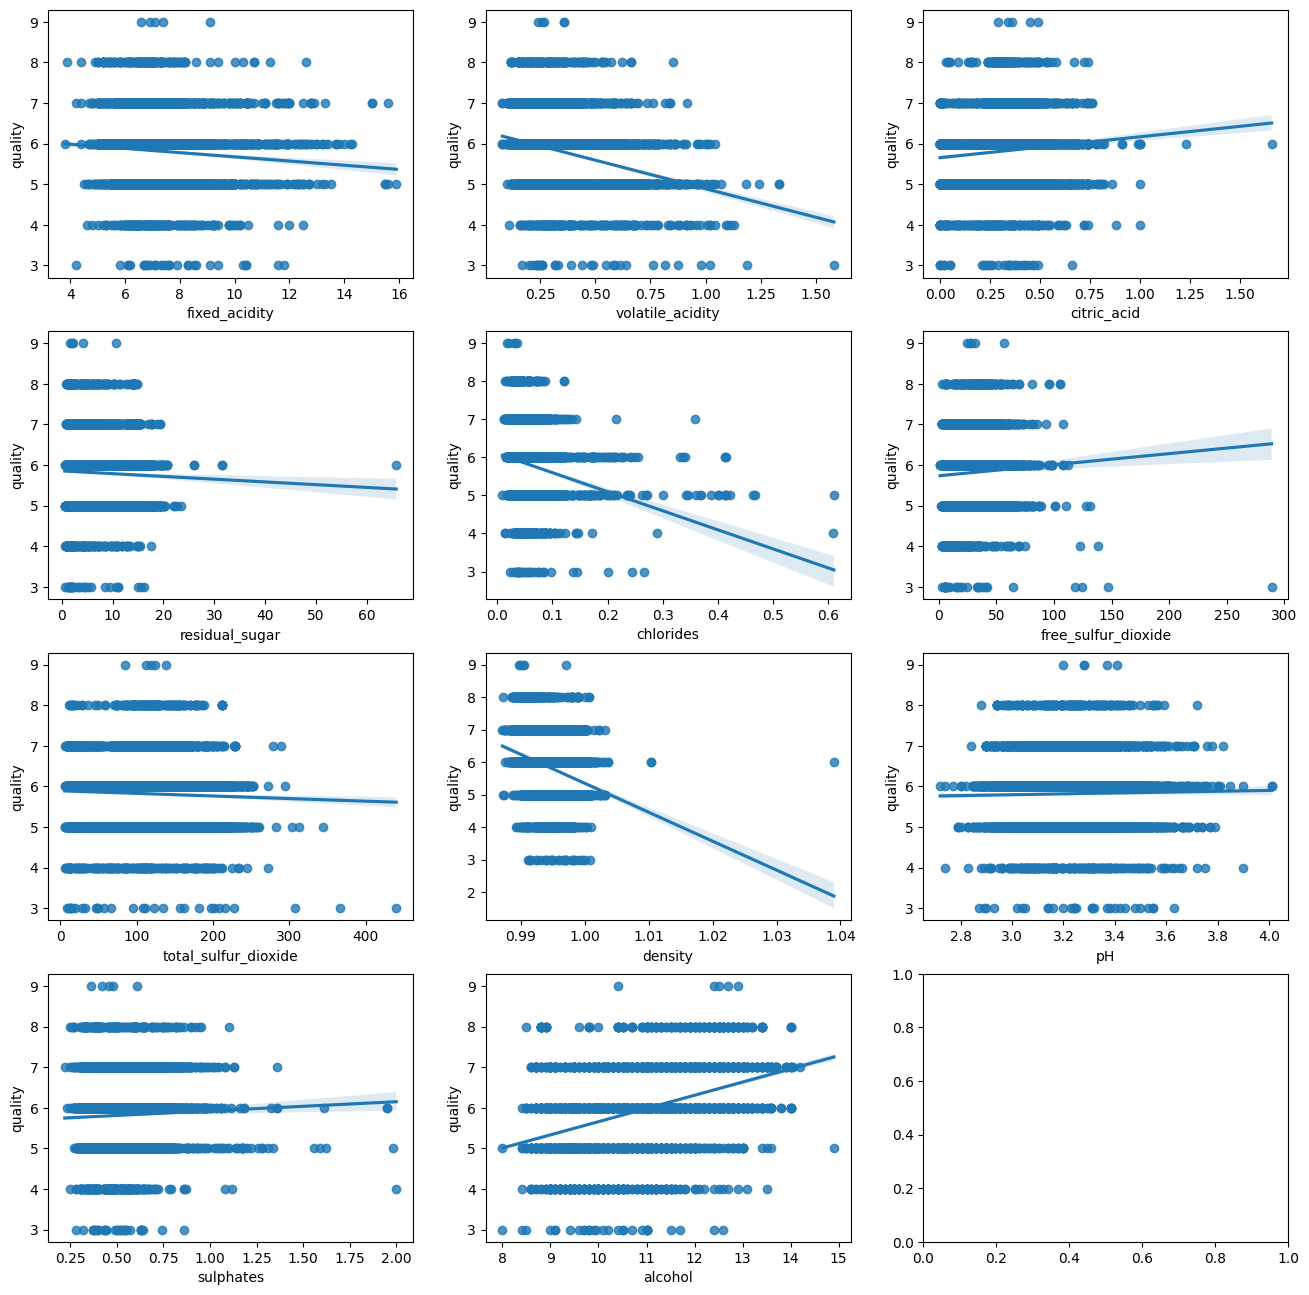

In [303]:
## 산점도
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=4)

x_features = list(X.columns)

for i, feat in enumerate(x_features): 
    row = i // 3
    col = i % 3
    sns.regplot(data=dfWineQuality, x=feat, y='quality', ax=axs[row][col])

plt.show()

In [304]:
## 9등급 와인 추출
dfTemp = dfWineQuality[dfWineQuality['quality'] == 9]

In [305]:
## 9등급 와인 최종 테스트값
dfWineTop = dfTemp.drop(['quality', 'color'], axis=1)

In [306]:
predicts = model.predict(dfWineTop)

In [307]:
predicts

array([6.00654714, 6.5351837 , 6.49448607, 6.5694913 , 6.61656098])

##### 결론
- 머신러닝으로 학습을 해도 9등급 와인에 대해서 제대로 예측을 못함